In [ ]:
#hide
from mldsutils.mldsutils import *

# `mldsutils`: A machine-learning and data science utility package

## Dr. Tirthajyoti Sarkar, Fremont, CA

> This is a utility package for some of the most common data science (DS) and machine learning (ML) functions I use everyday.

## Install

`pip install mldsutils`

## How to use

- Import the library
- Define a list of Scikit-learn estimators with your choice of hyperparameters
- Generate some synthetic data
- Run the `run_regressor` function to iterate through each of them and evaluate the given datatset

### Import

In [ ]:
from mldsutils.mldsutils import *
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification

### Classifiers and their names

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=10),]

clf_names = ['k-Nearest Neighbors(3)',
             'Support Vector Machine with Linear Kernel',
            'Support Vector Machine with RBF Kernel']

### Some data

In [ ]:
X1, y1 = make_classification(n_features=20, n_samples=2000,n_redundant=0, n_informative=20,
                             n_clusters_per_class=1)

### Run
Note, you will get back a Pandas DataFrame from this

In [ ]:
d1,d2 = run_classifiers(X1,y1,
                        clf_lst=classifiers,names = clf_names,
                        metric='f1',verbose=True)

Finished 10 runs for k-Nearest Neighbors(3) algorithm
---------------------------------------------------------------------------
Finished 10 runs for Support Vector Machine with Linear Kernel algorithm
---------------------------------------------------------------------------
Finished 10 runs for Support Vector Machine with RBF Kernel algorithm
---------------------------------------------------------------------------


## Examining the result

### Checking the dataframe of F1-scores

In [ ]:
d1

,k-Nearest Neighbors(3),Support Vector Machine with Linear Kernel,Support Vector Machine with RBF Kernel
0,0.987013,0.979021,0.642857
1,0.987893,0.972705,0.000000
2,0.984293,0.983213,0.655462
3,0.984925,0.972093,0.644068
4,0.992908,0.976636,0.000000
5,0.992405,0.967901,0.009950
6,0.973761,0.966507,0.009804
7,0.977887,0.990291,0.648649
8,0.991870,0.990521,0.000000
9,0.987593,0.974747,0.264317


### Stats of the `d1` to compare algorithms

In [ ]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
k-Nearest Neighbors(3),10.0,0.986055,0.006236,0.973761,0.984451,0.987303,0.990876,0.992908
Support Vector Machine with Linear Kernel,10.0,0.977364,0.008442,0.966507,0.972246,0.975691,0.982165,0.990521
Support Vector Machine with RBF Kernel,10.0,0.287511,0.320052,0.000000,0.002451,0.137134,0.643765,0.655462


### Checking the dataframe of fitting/training time

In [ ]:
d2

,k-Nearest Neighbors(3),Support Vector Machine with Linear Kernel,Support Vector Machine with RBF Kernel
0,0.000,19.529,128.902
1,0.000,17.581,138.664
2,0.000,27.340,142.638
3,0.977,19.531,125.963
4,0.956,19.528,139.639
5,0.000,16.598,124.063
6,0.000,15.672,124.171
7,0.976,20.506,135.868
8,0.000,22.464,152.332
9,0.000,20.490,123.982


In [ ]:
d2.describe().T

,count,mean,std,min,25%,50%,75%,max
k-Nearest Neighbors(3),10.0,0.2909,0.468427,0.000,0.00000,0.000,0.71700,0.977
Support Vector Machine with Linear Kernel,10.0,19.9239,3.286444,15.672,18.06775,19.530,20.50200,27.340
Support Vector Machine with RBF Kernel,10.0,133.6222,9.733031,123.982,124.61900,132.385,139.39525,152.332


## Visualizing the results with the `plot_bars` function

Make sure to pass the correct titles of the plots. Otherwise, default strings will be plotted which may indicate wrong thing for your experiment.

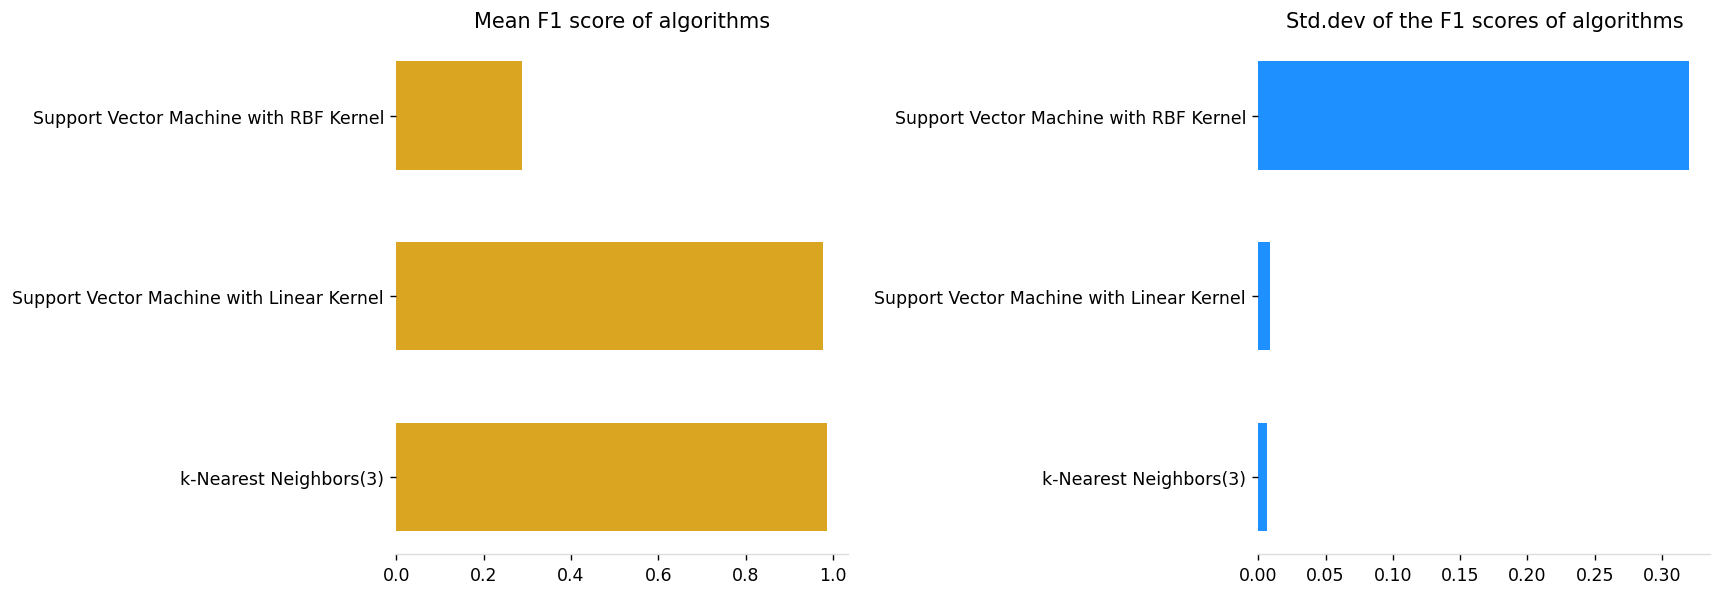

In [ ]:
plot_bars(d1,t1="Mean F1 score of algorithms",
              t2="Std.dev of the F1 scores of algorithms")

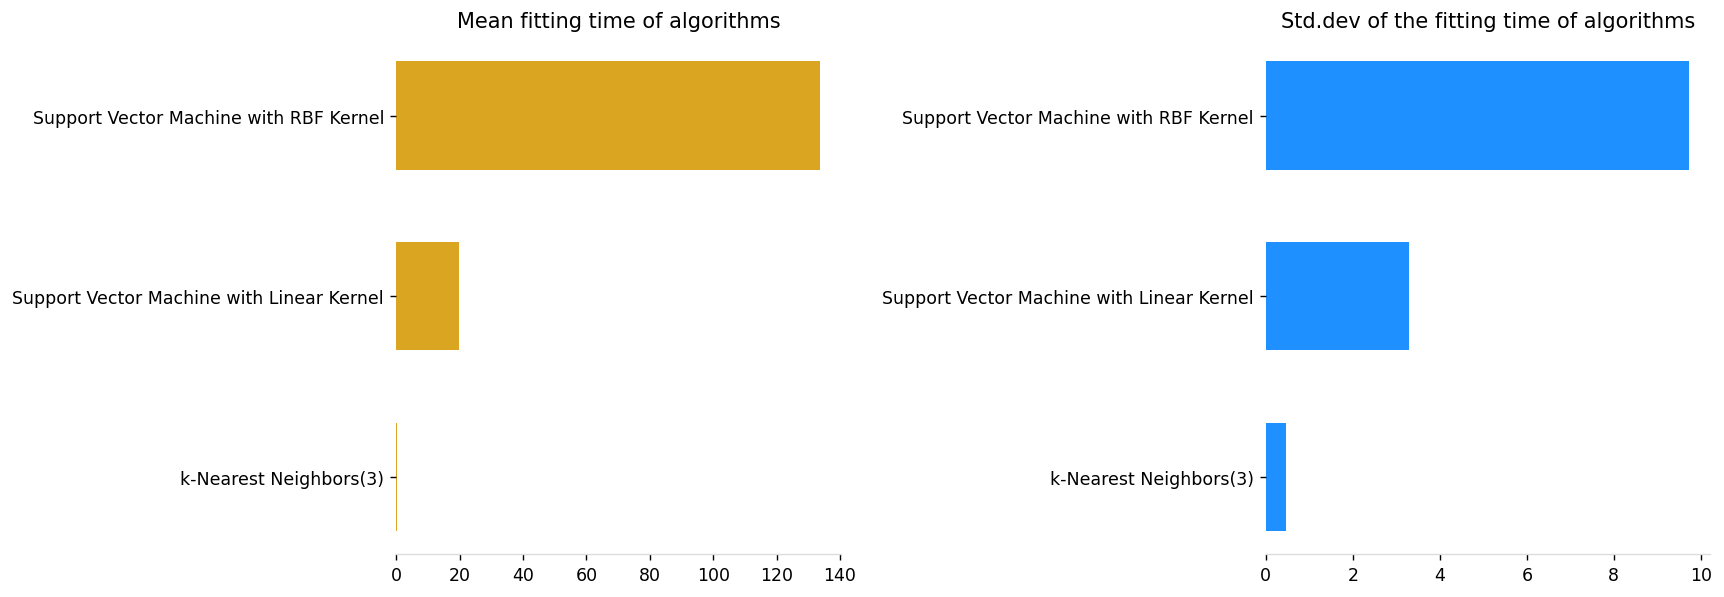

In [ ]:
plot_bars(d2,t1="Mean fitting time of algorithms",
              t2="Std.dev of the fitting time of algorithms")